In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
from collections import Counter

In [73]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 10]

In [74]:
excel_file = 'oracle_seats_geo_sorted.xls'
df = pd.read_excel(excel_file)
df

,stat_date,acct_id,login,geo,login_date_time,login_date,login_time,logout_date_time,logout_date,logout_time,duration
0,2019-06-01,10561,swan62,GC,2019-05-31 17:59:00,2019-05-31,17:59:00,2019-06-01 09:26:00,2019-06-01,09:26:00,15:27:00
1,2019-06-01,13248,sliu36,GC,2019-05-31 18:00:00,2019-05-31,18:00:00,2019-06-01 08:29:00,2019-06-01,08:29:00,14:29:00
2,2019-06-01,47709387,ytan37,GC,2019-05-31 21:49:00,2019-05-31,21:49:00,2019-06-01 08:29:00,2019-06-01,08:29:00,10:40:00
3,2019-06-01,56311486,rwan58,NaN,2019-05-31 21:56:00,2019-05-31,21:56:00,2019-06-01 08:30:00,2019-06-01,08:30:00,10:34:00
4,2019-06-01,21639365,plian2,GC,2019-05-31 21:56:00,2019-05-31,21:56:00,2019-06-01 08:29:00,2019-06-01,08:29:00,10:33:00
5,2019-06-01,48759348,nzha27,GC,2019-05-31 21:57:00,2019-05-31,21:57:00,2019-06-01 08:30:00,2019-06-01,08:30:00,10:33:00
6,2019-06-01,46939257,ali55,NaN,2019-05-31 21:58:00,2019-05-31,21:58:00,2019-06-01 08:30:00,2019-06-01,08:30:00,10:32:00
7,2019-06-01,41917176,vjing,GC,2019-05-31 22:08:00,2019-05-31,22:08:00,2019-06-01 08:30:00,2019-06-01,08:30:00,10:22:00
8,2019-06-01,46939336,rwan54,GC,2019-05-31 22:10:00,2019-05-31,22:10:00,2019-06-01 08:46:00,2019-06-01,08:46:00,10:36:00
9,2019-06-01,47709362,kxing3,GC,2019-05-31 22:25:00,2019-05-31,22:25:00,2019-06-01 08:30:00,2019-06-01,08:30:00,10:05:00


In [75]:
stat_date_count = df['stat_date'].dt.date.value_counts().sort_index()
stat_date_count

2019-06-01    253
2019-06-02    336
2019-06-03    527
2019-06-04    533
2019-06-05    522
2019-06-06    512
2019-06-07    486
2019-06-08    251
2019-06-09    341
2019-06-10    514
2019-06-11    455
2019-06-12    459
2019-06-13    474
2019-06-14    465
2019-06-15    216
2019-06-16    337
2019-06-17    484
2019-06-18    488
2019-06-19    470
2019-06-20    479
2019-06-21    460
2019-06-22    217
2019-06-23    343
Name: stat_date, dtype: int64

In [76]:
overall_count = df['geo'].value_counts(dropna=False).sort_index()
overall_count

AP        532
AP/US      93
EU       4076
GC       1817
GLBL     1714
JP        539
NaN       851
Name: geo, dtype: int64

In [77]:
len(df)

9622

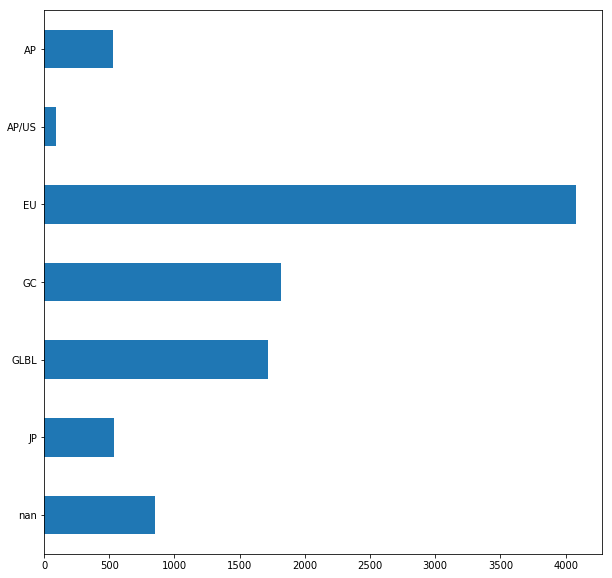

In [78]:
overall_count.plot.barh().invert_yaxis()

In [79]:
year = 2019
month = 6
day = 1
login_hour = 0
login_hour_upper = 1
login_minute = 0
logout_minute = 0
midnight_minute = 59
midnight_second = 59
second = 0

MAX_DATE = 14
MAX_HOUR = 24
MAX_DATE = 23
DATE_RANGE = 23

hourly_count = []
geo_count_total = []


In [80]:
for i in range(0, DATE_RANGE):
    for k in range (0, MAX_HOUR):
        
        leftbound = dt.datetime(year,month,day,login_hour,login_minute,second)
            
        if (k == 23):
            login_hour_upper = 23
            login_minute = midnight_minute
            second = midnight_second
        
        rightbound = dt.datetime(year,month,day,login_hour_upper,login_minute,second)
        
        currently_logged_in = df[( ((df['login_date_time'] >= leftbound) & (df['login_date_time'] <= rightbound)) 
                                   | ((df['login_date_time'] <= leftbound) & (df['logout_date_time'] >= leftbound) & (df['logout_date_time'] <= rightbound)) )]
        
        geo_count = currently_logged_in['geo'].value_counts(dropna=False).sort_index()
           
        hourly_count.append([leftbound, len(currently_logged_in)])
        
        geo_count_total.append(geo_count)
    
        if (login_hour_upper < MAX_HOUR):
            login_hour += 1
            login_hour_upper += 1
                   
        
    login_hour = 0
    login_hour_upper = 1
    login_minute = 0
    second = 0
        
    if(day <= MAX_DATE):
        day += 1
    


In [81]:
currently_logged_in.head()

,stat_date,acct_id,login,geo,login_date_time,login_date,login_time,logout_date_time,logout_date,logout_time,duration
9469,2019-06-23,12570,dklim1,EU,2019-06-23 23:00:00,2019-06-23,23:00:00,2019-06-24 01:59:00,2019-06-24,01:59:00,02:59:00
9470,2019-06-23,46896882,herdur,EU,2019-06-23 23:01:00,2019-06-23,23:01:00,2019-06-24 02:20:00,2019-06-24,02:20:00,03:19:00
9471,2019-06-23,59192394,tkanra,EU,2019-06-23 23:01:00,2019-06-23,23:01:00,2019-06-24 02:13:00,2019-06-24,02:13:00,03:12:00
9472,2019-06-23,46851803,rkerem,EU,2019-06-23 23:03:00,2019-06-23,23:03:00,2019-06-24 02:19:00,2019-06-24,02:19:00,03:16:00
9473,2019-06-23,47494259,sorses,EU,2019-06-23 23:03:00,2019-06-23,23:03:00,2019-06-24 02:12:00,2019-06-24,02:12:00,03:09:00


In [82]:
#geo_count

In [83]:
columns = ['Datetime', 'Count']
hourly_count_df = pd.DataFrame(hourly_count, columns=columns)
#hourly_count_df.set_index('Datetime', inplace=True)
hourly_count_df.head()

,Datetime,Count
0,2019-06-01 00:00:00,32
1,2019-06-01 01:00:00,2
2,2019-06-01 02:00:00,6
3,2019-06-01 03:00:00,25
4,2019-06-01 04:00:00,39


In [84]:
geo_df = pd.DataFrame(geo_count_total).reset_index()
geo_df.drop('index', axis=1, inplace=True)
geo_df

,nan,AP,AP/US,EU,GC,GLBL,JP
0,NaN,NaN,NaN,28.0,NaN,4.0,NaN
1,NaN,NaN,NaN,1.0,NaN,1.0,NaN
2,NaN,NaN,NaN,1.0,5.0,NaN,NaN
3,4.0,NaN,NaN,NaN,4.0,17.0,NaN
4,9.0,2.0,1.0,2.0,NaN,25.0,NaN
5,7.0,1.0,NaN,2.0,3.0,20.0,NaN
6,24.0,1.0,1.0,2.0,2.0,21.0,NaN
7,14.0,4.0,1.0,1.0,2.0,15.0,NaN
8,9.0,4.0,3.0,16.0,21.0,19.0,NaN
9,4.0,4.0,NaN,9.0,1.0,11.0,NaN


In [85]:
len(geo_df)

552

In [86]:
len(hourly_count_df)

552

In [87]:
combined_df = pd.concat([hourly_count_df, geo_df], axis = 1, sort=False, join='outer')
combined_df

,Datetime,Count,nan,AP,AP/US,EU,GC,GLBL,JP
0,2019-06-01 00:00:00,32,NaN,NaN,NaN,28.0,NaN,4.0,NaN
1,2019-06-01 01:00:00,2,NaN,NaN,NaN,1.0,NaN,1.0,NaN
2,2019-06-01 02:00:00,6,NaN,NaN,NaN,1.0,5.0,NaN,NaN
3,2019-06-01 03:00:00,25,4.0,NaN,NaN,NaN,4.0,17.0,NaN
4,2019-06-01 04:00:00,39,9.0,2.0,1.0,2.0,NaN,25.0,NaN
5,2019-06-01 05:00:00,33,7.0,1.0,NaN,2.0,3.0,20.0,NaN
6,2019-06-01 06:00:00,51,24.0,1.0,1.0,2.0,2.0,21.0,NaN
7,2019-06-01 07:00:00,37,14.0,4.0,1.0,1.0,2.0,15.0,NaN
8,2019-06-01 08:00:00,72,9.0,4.0,3.0,16.0,21.0,19.0,NaN
9,2019-06-01 09:00:00,29,4.0,4.0,NaN,9.0,1.0,11.0,NaN


In [89]:
#%matplotlib inline
#plt.rcParams["figure.figsize"] = [150, 150]

#plot = hourly_count_df.plot.barh().invert_yaxis()

In [ ]:
combined_df.to_excel("hourly count table.xlsx")